In [1]:
# Install required libraries if not already present
!pip install pandas matplotlib seaborn scikit-learn

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (assuming you've uploaded it to Colab)
df = pd.read_csv('/content/demand_supply.data.csv')

# Display the first few rows of the dataset
df.head()


,Unnamed: 0,Price,Supply,Demand
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224


In [4]:
# Display basic information about the dataset
df.info()

# Check for missing values
print("Missing values in the dataset:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  498 non-null    int64  
 1   Price       498 non-null    float64
 2   Supply      498 non-null    float64
 3   Demand      498 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 15.7 KB
Missing values in the dataset:
 Unnamed: 0    0
Price         0
Supply        0
Demand        0
dtype: int64


In [5]:
# Define independent variables (features) and dependent variable (target)
X = df.drop('Demand', axis=1)  # Drop 'Demand' from the features
y = df['Demand']  # Target variable


In [6]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Create a multiple linear regression model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)


LinearRegression()

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.45378105451898887
R-squared: 0.9750262916342848


<ipython-input-9-7b37a4676d8b>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, color='red')


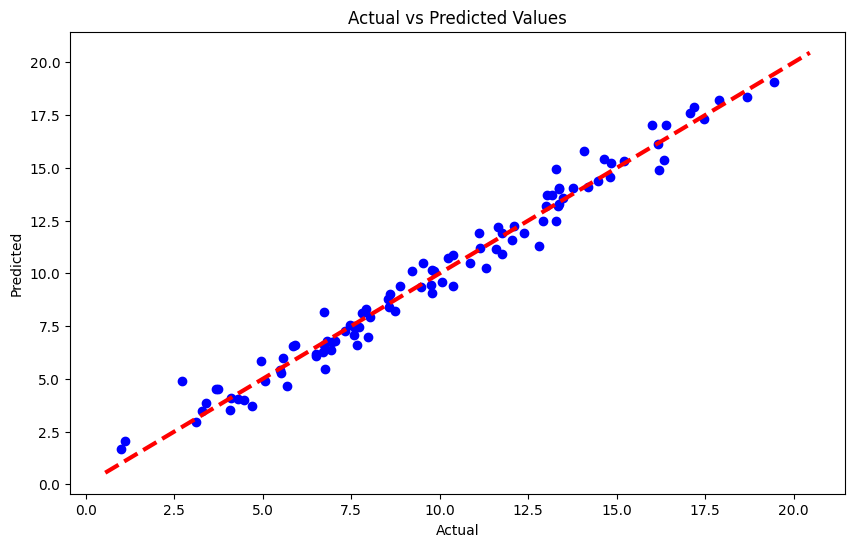

In [9]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()
